# Basic Example

## Importing packages

In [1]:
import af2_analysis
from af2_analysis import clustering
from af2_analysis import peptide
%matplotlib inline

## Importing Alpahfold Data 

In [2]:
DATA_PATH = '../../../src/af2_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af2_analysis.Data(DATA_PATH)
my_data.df.head()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,relaxed_pdb,json
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...


## show 3D structure

In [16]:
view = my_data.show_3d(my_data.df['ipTM'].idxmax())
view

NGLWidget()

In [21]:
import nglview
nglview.write_html('../_static/dimer.html', [view])

In [22]:
from IPython.display import IFrame
IFrame(src='../_static/dimer.html', width=600, height=300)

## Computing scores


In [4]:
#compute_pdockq
my_data.compute_pdockq()
#compute_pdockq2
my_data.compute_pdockq2()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [5]:
#extract_pae_pep
peptide.extract_pae_pep(my_data)
#compute_pdockq2_lig
peptide.compute_pdockq2_lig(my_data)
#compute_LIS_pep
peptide.compute_LIS_pep(my_data)
#extract_plddt_pep
peptide.extract_plddt_pep(my_data)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [6]:
my_data.df.head()

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,PAE_A_B,PAE_B_A,PAE_B_B,PAE_pep_rec,PAE_rec_pep,pdockq2_lig,LIS,LIS_rec_pep,LIS_pep_rec,plddt_pep
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,...,20.984252,21.026196,16.054161,21.026196,20.984252,0.011992,"[[0.44785182119205297, 0.11038825757575756], [...",0.107481,0.110388,38.685476
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,...,22.746667,22.760130,17.193441,22.760130,22.746667,0.010624,"[[0.4598769470404984, 0.10359090909090911], [0...",0.103333,0.103591,34.902857
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,...,19.257993,19.228260,13.493810,19.228260,19.257993,0.014287,"[[0.48629706152433433, 0.08237745098039216], [...",0.084944,0.082377,44.560238
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,...,19.288968,19.363730,14.125618,19.363730,19.288968,0.016360,"[[0.4926578192252511, 0.10013468013468015], [0...",0.099600,0.100135,44.120952
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,...,11.075300,11.190368,8.268022,11.190368,11.075300,0.168438,"[[0.5450712678169541, 0.41792701625268325], [0...",0.417809,0.417927,64.091667


In [7]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'pdockq',
       'pdockq2_A', 'pdockq2_B', 'PAE_A_A', 'PAE_A_B', 'PAE_B_A', 'PAE_B_B',
       'PAE_pep_rec', 'PAE_rec_pep', 'pdockq2_lig', 'LIS', 'LIS_rec_pep',
       'LIS_pep_rec', 'plddt_pep'],
      dtype='object')

## Plots

### Plddt plot

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

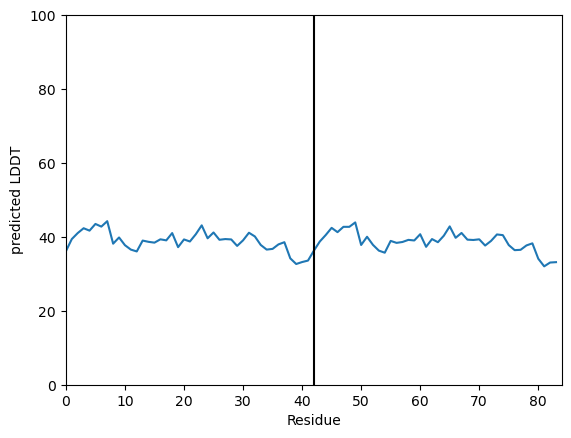

In [8]:
# Model 1
my_data.plot_plddt([0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

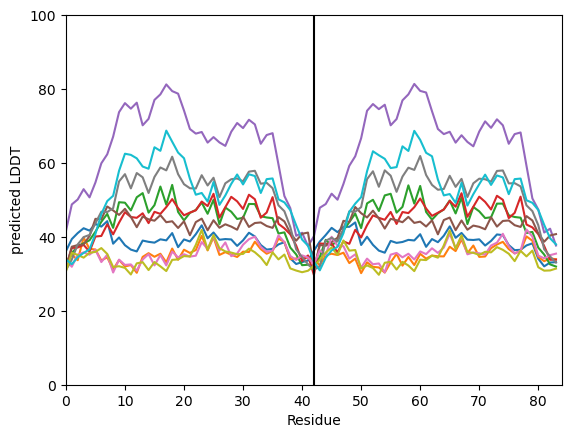

In [9]:
# Model 1 to 
my_data.plot_plddt(range(10))

### Plddt pae

(<Figure size 640x480 with 2 Axes>, <Axes: >)

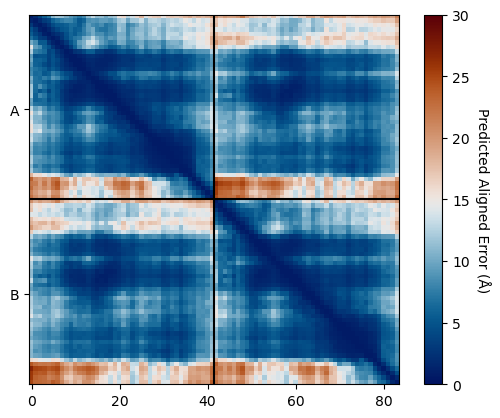

In [17]:
# Best Model
my_data.plot_pae(my_data.df['ipTM'].idxmax())

(<Figure size 640x480 with 2 Axes>, <Axes: >)

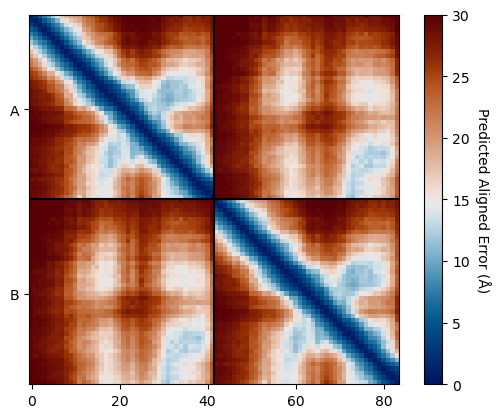

In [18]:
# Worst Model
my_data.plot_pae(my_data.df['ipTM'].idxmin())

## Clustering

Read all structures
Peptide chain is :B
align structures


/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:721: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

Extract contact residues
Contact residues : {6, 10, 12, 14, 17, 18, 19, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
Compute distance Matrix


  0%|          | 0/40 [00:00<?, ?it/s]

Max RMSD is 24.60 A
Compute Linkage clustering
10 clusters founded for beta_amyloid_dimer_d2fa3_0


/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/MDAnalysis/analysis/diffusionmap.py:288: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


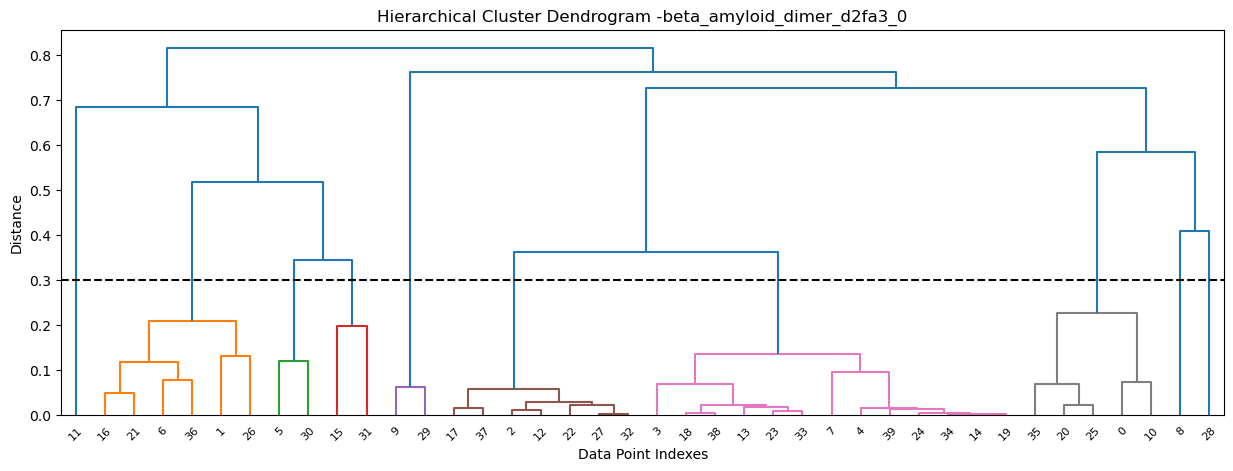

In [19]:
clustering.hierarchical(my_data.df, threshold=0.3)

## Principal component analysis

/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/af2_analysis/clustering.py:469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep_clust_df["cluster"] = keep_clust_df["cluster"].astype('category')


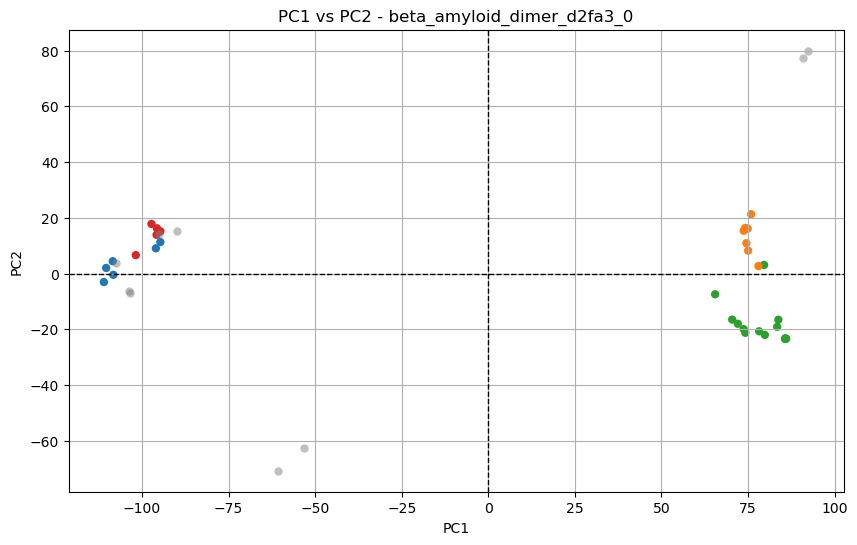

In [20]:
clustering.compute_pc(my_data.df)
clustering.plot_pc(my_data.df)